In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

EXTRACTED_FEATURES_FILE = 'preprocessed_extracted_features_iemocap.csv'
plt.rcParams['figure.dpi'] = 150

## Data Study

In [2]:
df = pd.read_csv(EXTRACTED_FEATURES_FILE)
print(f"Number of Audio Files: {df.shape[0]}")
df = df.sort_values(['Emotion_Id', 'Gender'], ascending = (True, True))
df = df.set_index('File')
df

Number of Audio Files: 5531


,Interaction,Gender,Original_Duration,Duration,Emotion,Emotion_Id,Valence,Activation,Dominance,min_zcr,...,kurtosis_mfcc12,mean_mfcc13,mean_mfcc15,spikes_mfcc16,kurtosis_mfcc17,mean_mfcc17,kurtosis_mfcc18,spikes_mfcc19,mean_mfcc19,mean_mfcc20
File,,,,,,,,,,,,,,,,,,,,,
Ses01F_impro01_F012,improvised,Female,2.750000,1.504000,angry,0,2.0000,3.5,3.5,0.033203,...,-0.320905,-8.757206,-8.404855,0.500000,0.866702,-5.472984,-0.699776,0.541667,-3.827938,-3.650202
Ses01F_impro04_F028,improvised,Female,2.009937,1.401938,angry,0,2.0000,3.5,3.5,0.045898,...,-0.574212,-2.628902,-0.895181,0.454545,0.598305,-2.630841,1.595295,0.386364,4.014146,0.261080
Ses01F_impro04_F029,improvised,Female,3.159937,1.088000,angry,0,1.5000,4.0,4.0,0.059570,...,0.694246,6.143557,-9.851644,0.457143,0.462676,4.772063,-0.656826,0.485714,0.239811,-2.118670
Ses01F_impro04_F030,improvised,Female,3.184938,1.984000,angry,0,1.5000,3.5,4.0,0.023926,...,-0.786966,-2.057442,-2.149754,0.380952,3.148961,0.103404,0.508263,0.492063,-0.673548,-3.483135
Ses01F_impro04_F031,improvised,Female,4.400000,3.456000,angry,0,1.5000,3.0,3.5,0.021484,...,-0.365762,-8.102477,-7.169555,0.467890,-0.743554,-3.183804,-0.385684,0.495413,-4.875592,-1.797227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ses05M_script02_2_M016,scripted,Male,11.170000,9.568000,neutral,3,3.3333,4.0,3.0,0.020996,...,0.581724,-4.950872,-4.878439,0.570000,1.219073,0.525132,0.015737,0.533333,-4.824389,0.655601
Ses05M_script03_1_M003,scripted,Male,3.050000,2.336000,neutral,3,3.5000,3.5,3.5,0.030273,...,1.424637,-6.094298,-5.317368,0.500000,-0.404922,-3.322443,0.211792,0.567568,-5.720670,-3.403372
Ses05M_script03_2_M010,scripted,Male,1.889938,0.800000,neutral,3,3.0000,2.5,2.0,0.012207,...,0.529705,-8.312709,-0.549523,0.538462,-0.279182,-1.114942,0.204155,0.538462,-6.870640,-0.719818


## Using the data in SOA

In [3]:
df = df[df['Emotion'].isin({'angry', 'neutral', 'sad', 'happy', 'excited'})]
df.loc[df['Emotion'] == 'excited', 'Emotion'] = 'happy'
df.loc[df['Emotion_Id'] == 5, 'Emotion_Id'] = 1
df.groupby(['Emotion', 'Emotion_Id']).agg({'Emotion': ['count']})

,,Emotion
,,count
Emotion,Emotion_Id,
angry,0,1103
happy,1,1636
neutral,3,1708
sad,2,1084


In [4]:
df.groupby(['Gender']).agg({'Gender': ['count']})

,Gender
,count
Gender,
Female,2649
Male,2882


## Audio Clip Durations

In [8]:
# 25th Percentile
def q25(x):
    return x.quantile(0.5)

# 75th Percentile
def q75(x):
    return x.quantile(0.9)

In [10]:
df.agg({'Original_Duration': ['min', q25, 'mean', q75, 'max'], 'Duration': ['min', q25, 'mean', q75, 'max']})

,Original_Duration,Duration
min,0.584937,0.256000
q25,3.576500,3.109938
mean,4.548985,4.064830
q75,8.687500,8.063375
max,34.138750,33.184000


In [11]:
print(tabulate(df.agg({'Original_Duration': ['min', q25, 'mean', q75, 'max'], 'Duration': ['min', q25, 'mean', q75, 'max']}), headers='keys', tablefmt='latex_booktabs'))

\begin{tabular}{lrr}
\toprule
      &   Original\_Duration &   Duration \\
\midrule
 min  &            0.584937 &    0.256   \\
 q25  &            3.5765   &    3.10994 \\
 mean &            4.54898  &    4.06483 \\
 q75  &            8.6875   &    8.06338 \\
 max  &           34.1388   &   33.184   \\
\bottomrule
\end{tabular}


In [12]:
df.groupby(['Emotion']).agg({'Original_Duration': ['min', q25, 'mean', q75, 'max'], 'Duration': ['min', q25, 'mean', q75, 'max']})

Original_Duration                                           Duration  \
                      min       q25      mean        q75        max      min   
Emotion                                                                        
angry            0.759938  3.610500  4.512938   8.497988  26.773000    0.320   
happy            0.584937  3.695688  4.621023   8.659937  34.138750    0.352   
neutral          0.730000  3.129938  3.901954   7.117356  20.289938    0.256   
sad              0.764188  4.146688  5.496433  11.052644  31.910000    0.576   

                                                   
              q25      mean        q75        max  
Emotion                                            
angry    2.894000  3.783044   7.513600  25.920000  
happy    3.248000  4.166262   8.065031  33.184000  
neutral  2.748750  3.500057   6.668400  19.937938  
sad      3.891969  5.088354  10.156800  31.456000

## Improvised vs Scripted Data

In [8]:
df.groupby(['Interaction']).agg({'Interaction': ['count']})

,Interaction
,count
Interaction,
improvised,2943
scripted,2588


In [9]:
df.groupby(['Emotion', 'Interaction']).agg({'Emotion': ['count']})

Emotion
                      count
Emotion Interaction        
angry   improvised      289
        scripted        814
happy   improvised      947
        scripted        689
neutral improvised     1099
        scripted        609
sad     improvised      608
        scripted        476

### Valence Variation for each Emotion Label

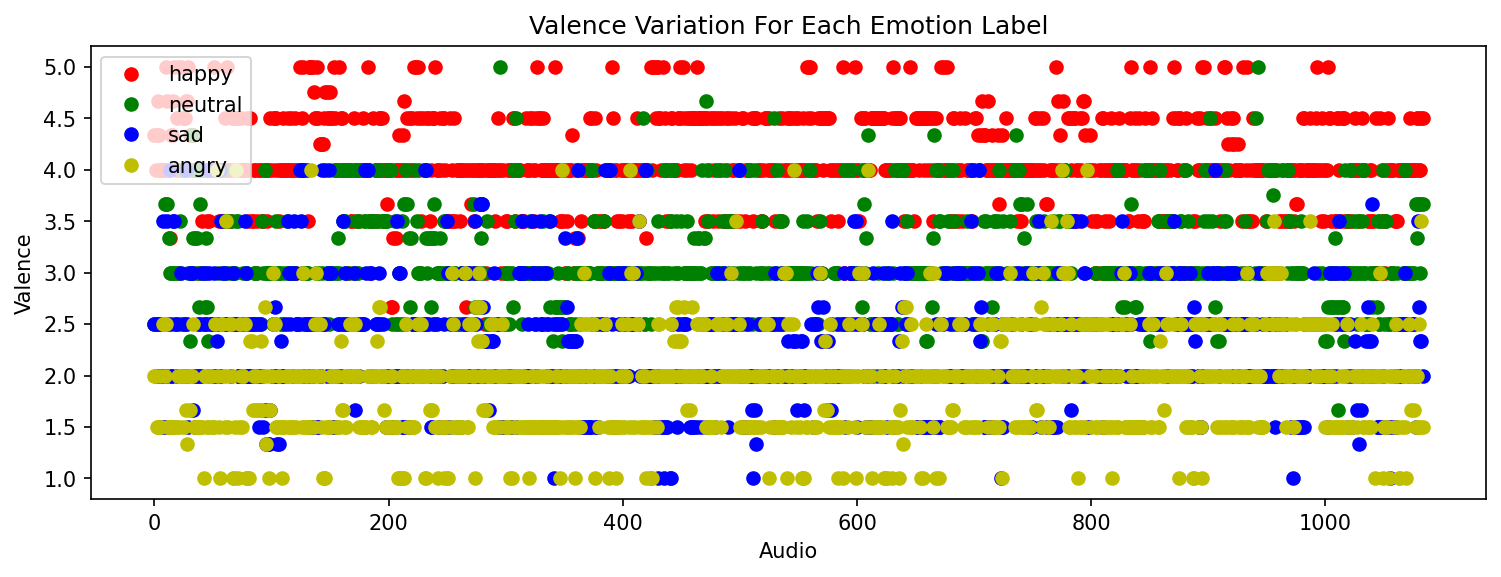

In [10]:
plt.figure(figsize=(12,4))
plt.title("Valence Variation For Each Emotion Label")
plt.xlabel("Audio")
plt.ylabel("Valence")
plt.plot([i for i in range(1084)], df.loc[df['Emotion'] == 'happy']['Valence'][:1084], 'ro', label="happy")
plt.plot([i for i in range(1084)], df.loc[df['Emotion'] == 'neutral']['Valence'][:1084], 'go', label="neutral")
plt.plot([i for i in range(1084)], df.loc[df['Emotion'] == 'sad']['Valence'][:1084], 'bo', label="sad")
plt.plot([i for i in range(1084)], df.loc[df['Emotion'] == 'angry']['Valence'][:1084], 'yo', label="angry")
plt.legend(loc="upper left")
plt.show()

### Activation Variation for each Emotion Label

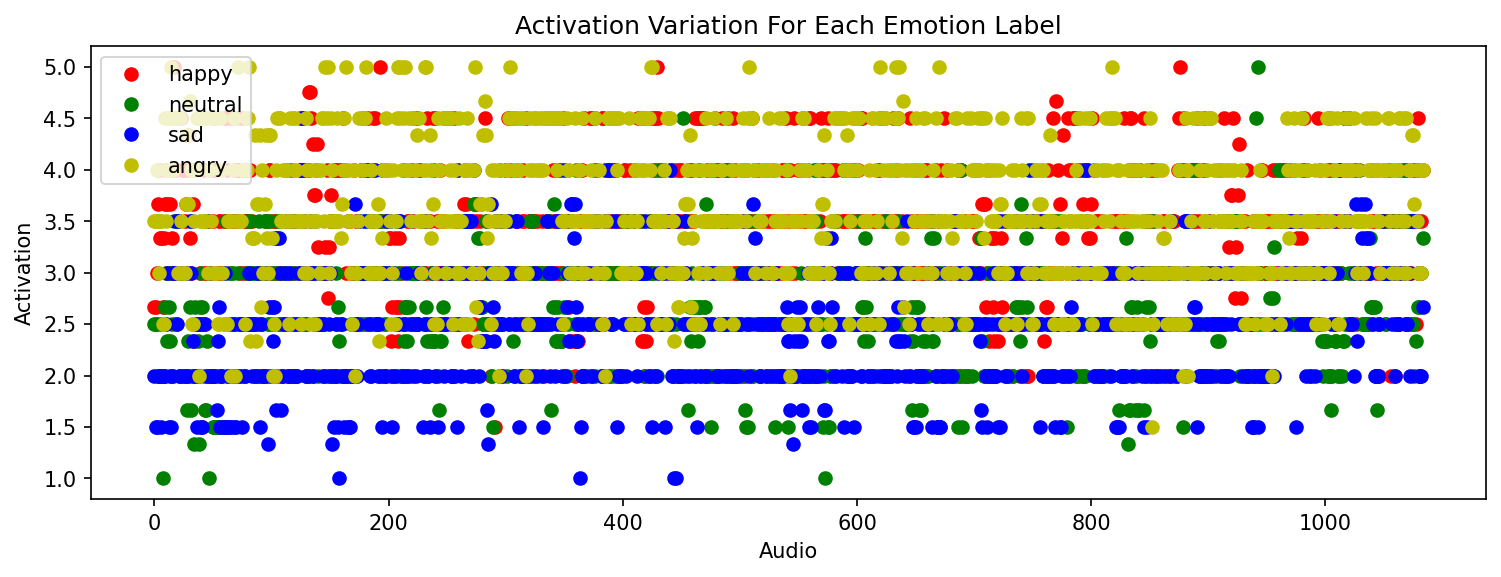

In [11]:
plt.figure(figsize=(12,4))
plt.title("Activation Variation For Each Emotion Label")
plt.xlabel("Audio")
plt.ylabel("Activation")
plt.plot([i for i in range(1084)], df.loc[df['Emotion'] == 'happy']['Activation'][:1084], 'ro', label="happy")
plt.plot([i for i in range(1084)], df.loc[df['Emotion'] == 'neutral']['Activation'][:1084], 'go', label="neutral")
plt.plot([i for i in range(1084)], df.loc[df['Emotion'] == 'sad']['Activation'][:1084], 'bo', label="sad")
plt.plot([i for i in range(1084)], df.loc[df['Emotion'] == 'angry']['Activation'][:1084], 'yo', label="angry")
plt.legend(loc="upper left")
plt.show()

### Dominance Variation for each Emotion Label

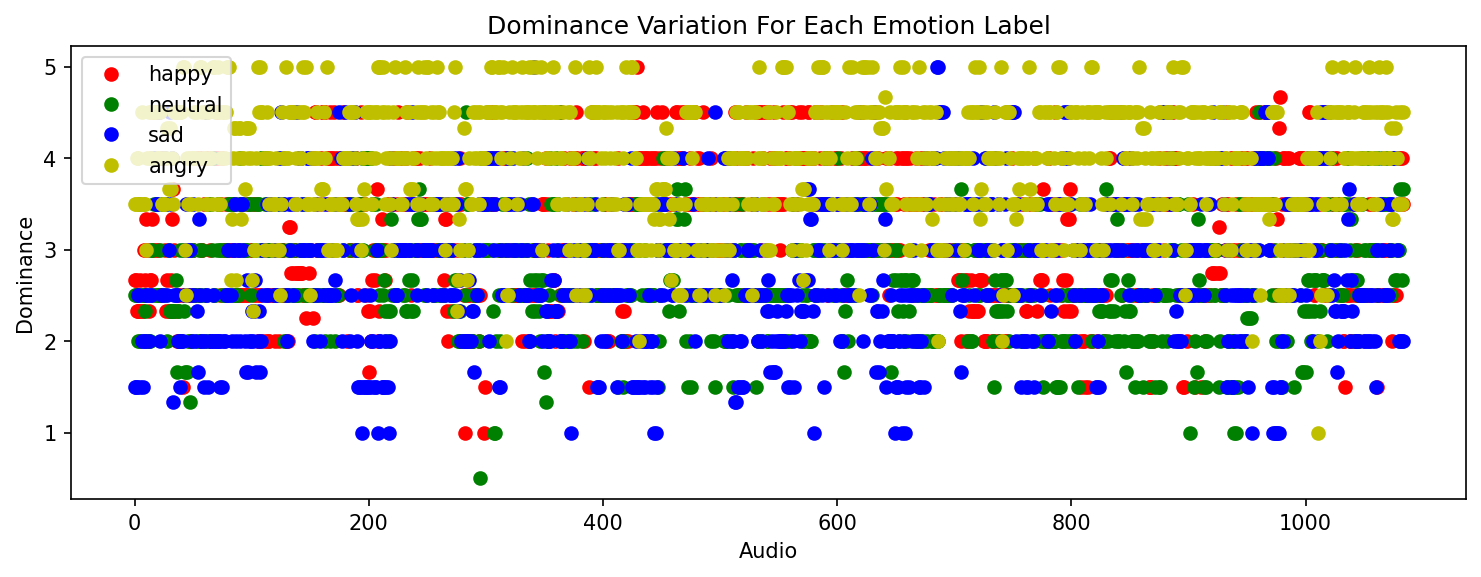

In [12]:
plt.figure(figsize=(12,4))
plt.title("Dominance Variation For Each Emotion Label")
plt.xlabel("Audio")
plt.ylabel("Dominance")
plt.plot([i for i in range(1084)], df.loc[df['Emotion'] == 'happy']['Dominance'][:1084], 'ro', label="happy")
plt.plot([i for i in range(1084)], df.loc[df['Emotion'] == 'neutral']['Dominance'][:1084], 'go', label="neutral")
plt.plot([i for i in range(1084)], df.loc[df['Emotion'] == 'sad']['Dominance'][:1084], 'bo', label="sad")
plt.plot([i for i in range(1084)], df.loc[df['Emotion'] == 'angry']['Dominance'][:1084], 'yo', label="angry")
plt.legend(loc="upper left")
plt.show()

## Improvised vs Scripted Data

In [13]:
df_improv = df[df['Interaction'] == 'improvised']
df_improv.groupby(['Emotion']).agg({'Emotion': ['count']})

,Emotion
,count
Emotion,
angry,289
happy,947
neutral,1099
sad,608


In [14]:
def labels_variations(emotions):
    df_improv = df[df['Interaction'] == 'improvised']
    df_scripted = df[df['Interaction'] == 'scripted']

    def scatter_plot(pos_x, pos_y, title, ylabel, df, bar_plot_data = [[], []]):
        def get_min_len(emotion):
            x = len(df_improv.loc[df_improv['Emotion'] == emotion][ylabel])
            y = len(df_scripted.loc[df_scripted['Emotion'] == emotion][ylabel])
            return x if x < y else y

        def plot(emotion, color):
            if emotion in emotions:
                data = df.loc[df['Emotion'] == emotion][ylabel][:get_min_len(emotion)]
                bar_plot_data[0].append(emotion)
                bar_plot_data[1].append(data.values)
                ax.plot([i for i in range(len(data))], data, color, label=f"{emotion} - max: {np.max(data)}, mean: {np.mean(data):.1f}, min: {np.min(data)}")
        
        ax = plt.subplot(grid[pos_x, pos_y])
        ax.set_title(title)
        ax.set(xlabel="Audio", ylabel=ylabel)

        plot('happy', 'ro')
        plot('neutral', 'go')
        plot('sad', 'bo')
        plot('angry', 'yo')

        ax.set_yticks(yticks)
        ax.legend(loc="upper left")
        return bar_plot_data

    def violin_plot(pos_x, title, ylabel, bar_plot_data):
        ax = plt.subplot(grid[pos_x, :])
        ax.set_title(title)
        ax.set(xlabel="Audio", ylabel=ylabel)

        x = len(bar_plot_data[0])//2
        df_barplot = pd.DataFrame(
            zip(
                bar_plot_data[0]*x,
                ['Improvised']*x+['Scripted']*x,
                bar_plot_data[1]
            ),
            columns=["Emotion", "Acting Type", ylabel]
        )
        df_barplot = df_barplot.explode(ylabel)
        df_barplot[ylabel] = df_barplot[ylabel].astype('float')
        sns.violinplot(x="Emotion", y=ylabel, hue="Acting Type", inner='quartile',
            data=df_barplot, ax=ax, palette="Set3", split=True, scale="count")

        ax.set_yticks(yticks)
        ax.legend(loc="upper left")

    grid = plt.GridSpec(6, 2, wspace=.1, hspace=.4)
    plt.figure(figsize=(20, 30), tight_layout=True)
    
    if len(emotions) == 4:
        yticks = [float(i)/10.0 for i in range(0, 75, 5)]
    else:
        yticks = [float(i)/10.0 for i in range(0, 65, 5)]

    bar_plot_data = scatter_plot(0, 0, "Valence Variation on Improvised SOA Data", "Valence", df_improv)
    bar_plot_data = scatter_plot(0, 1, "Valence Variation on Scripted SOA Data", "Valence", df_scripted)
    violin_plot(1, "Valence Variation on All SOA Data", "Valence", bar_plot_data)
    bar_plot_data = scatter_plot(2, 0, "Activation Variation on Improvised SOA Data", "Activation", df_improv)
    bar_plot_data = scatter_plot(2, 1, "Activation Variation on Scripted SOA Data", "Activation", df_scripted)
    violin_plot(3, "Activation Variation on All SOA Data", "Activation", bar_plot_data)
    bar_plot_data = scatter_plot(4, 0, "Dominance Variation on Improvised SOA Data", "Dominance", df_improv)
    bar_plot_data = scatter_plot(4, 1, "Dominance Variation on Scripted SOA Data", "Dominance", df_scripted)
    violin_plot(5, "Dominance Variation on All SOA Data", "Dominance", bar_plot_data)
    plt.show()

C:\Users\Chico\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


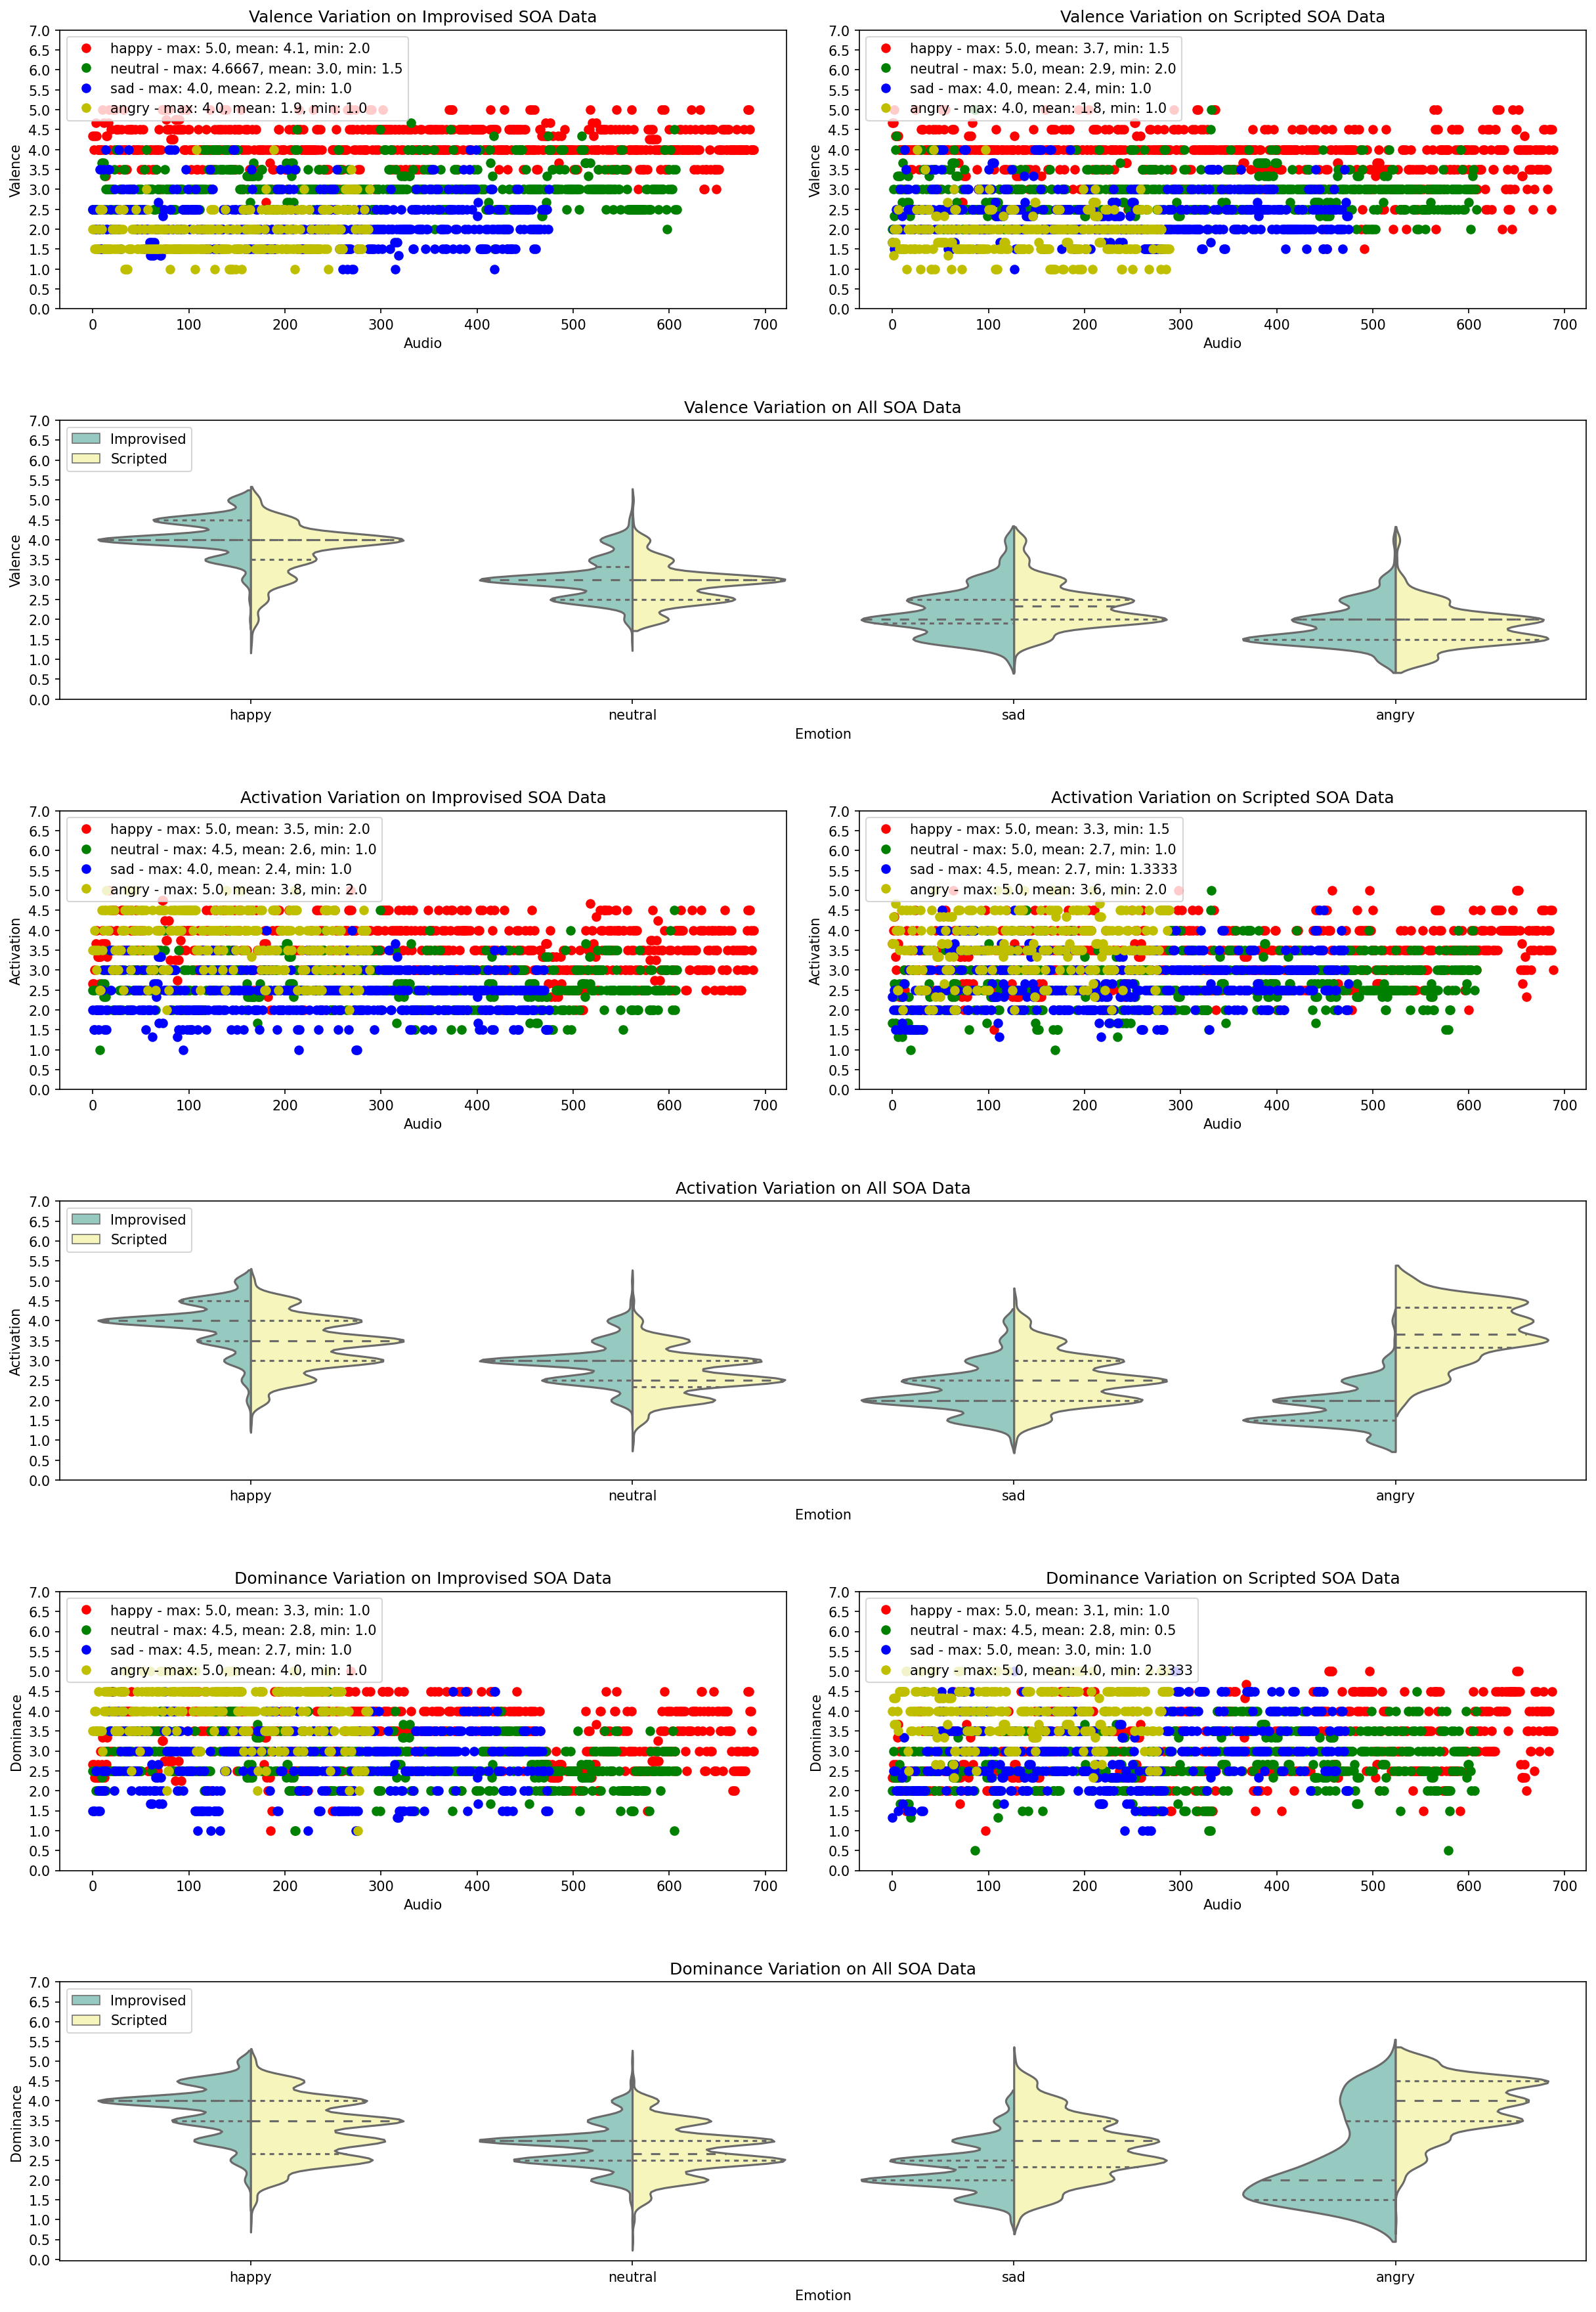

In [15]:
labels_variations(['happy', 'sad', 'angry', 'neutral'])

C:\Users\Chico\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


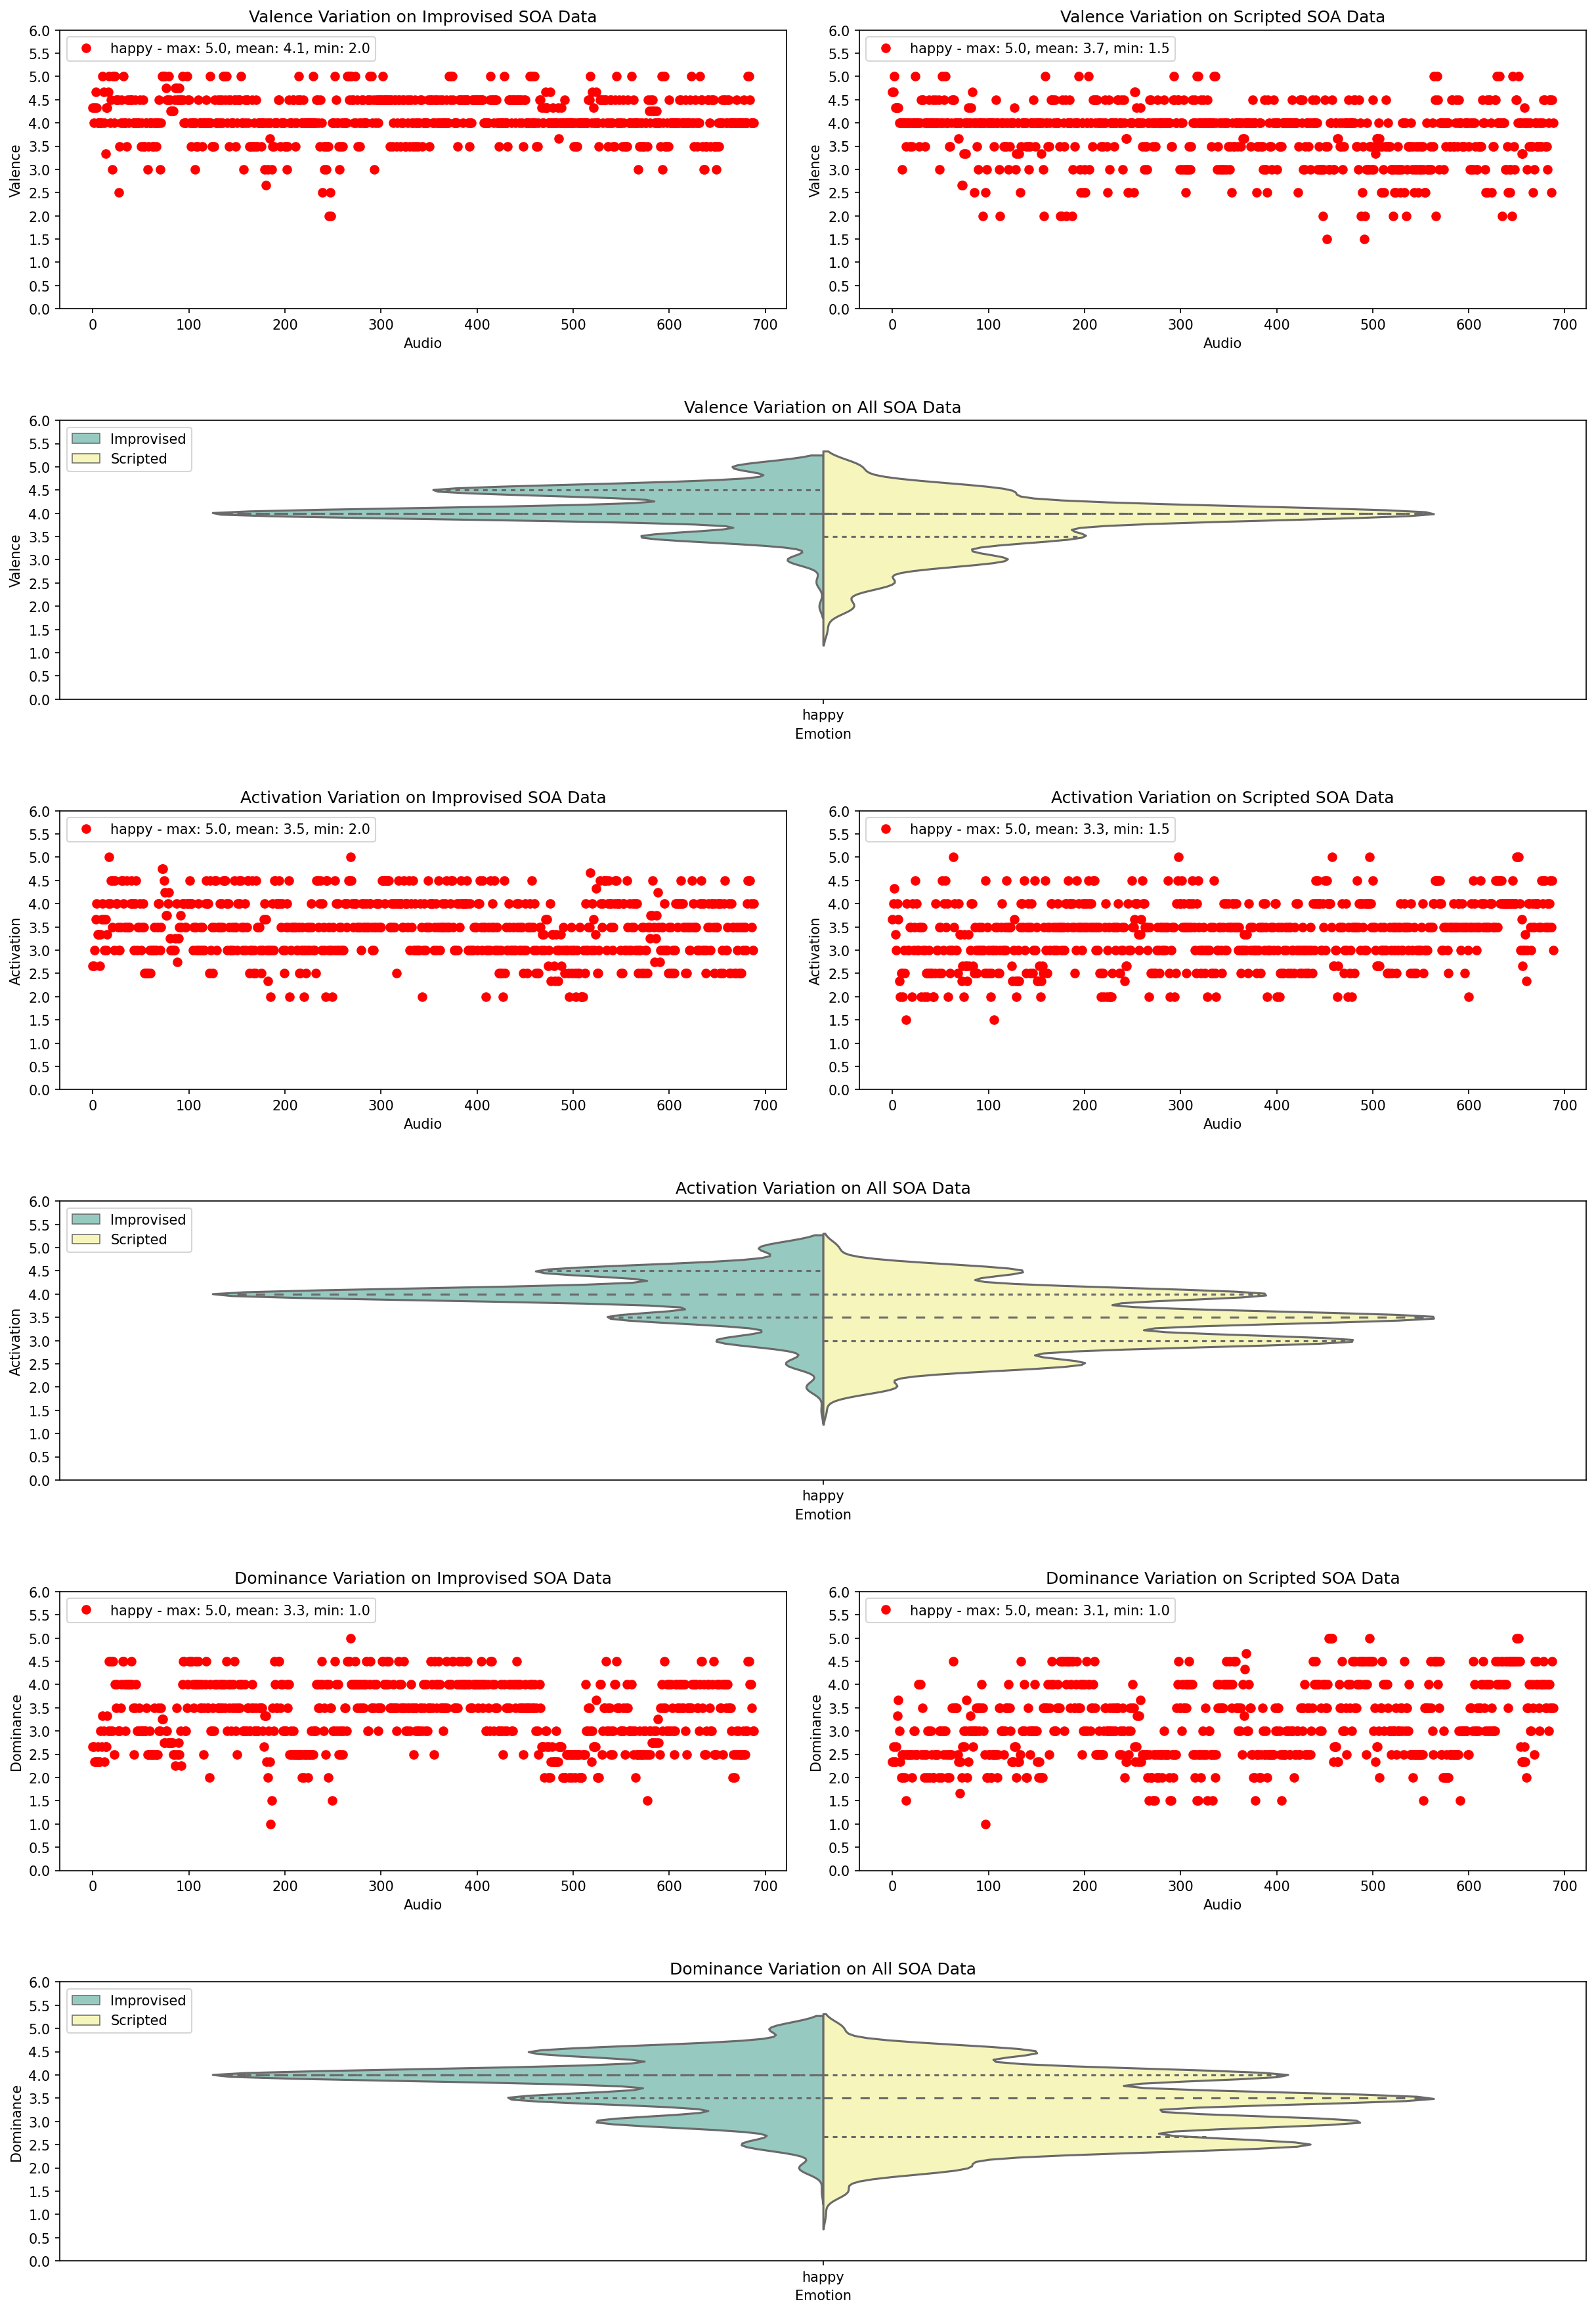

In [16]:
labels_variations(['happy'])

C:\Users\Chico\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


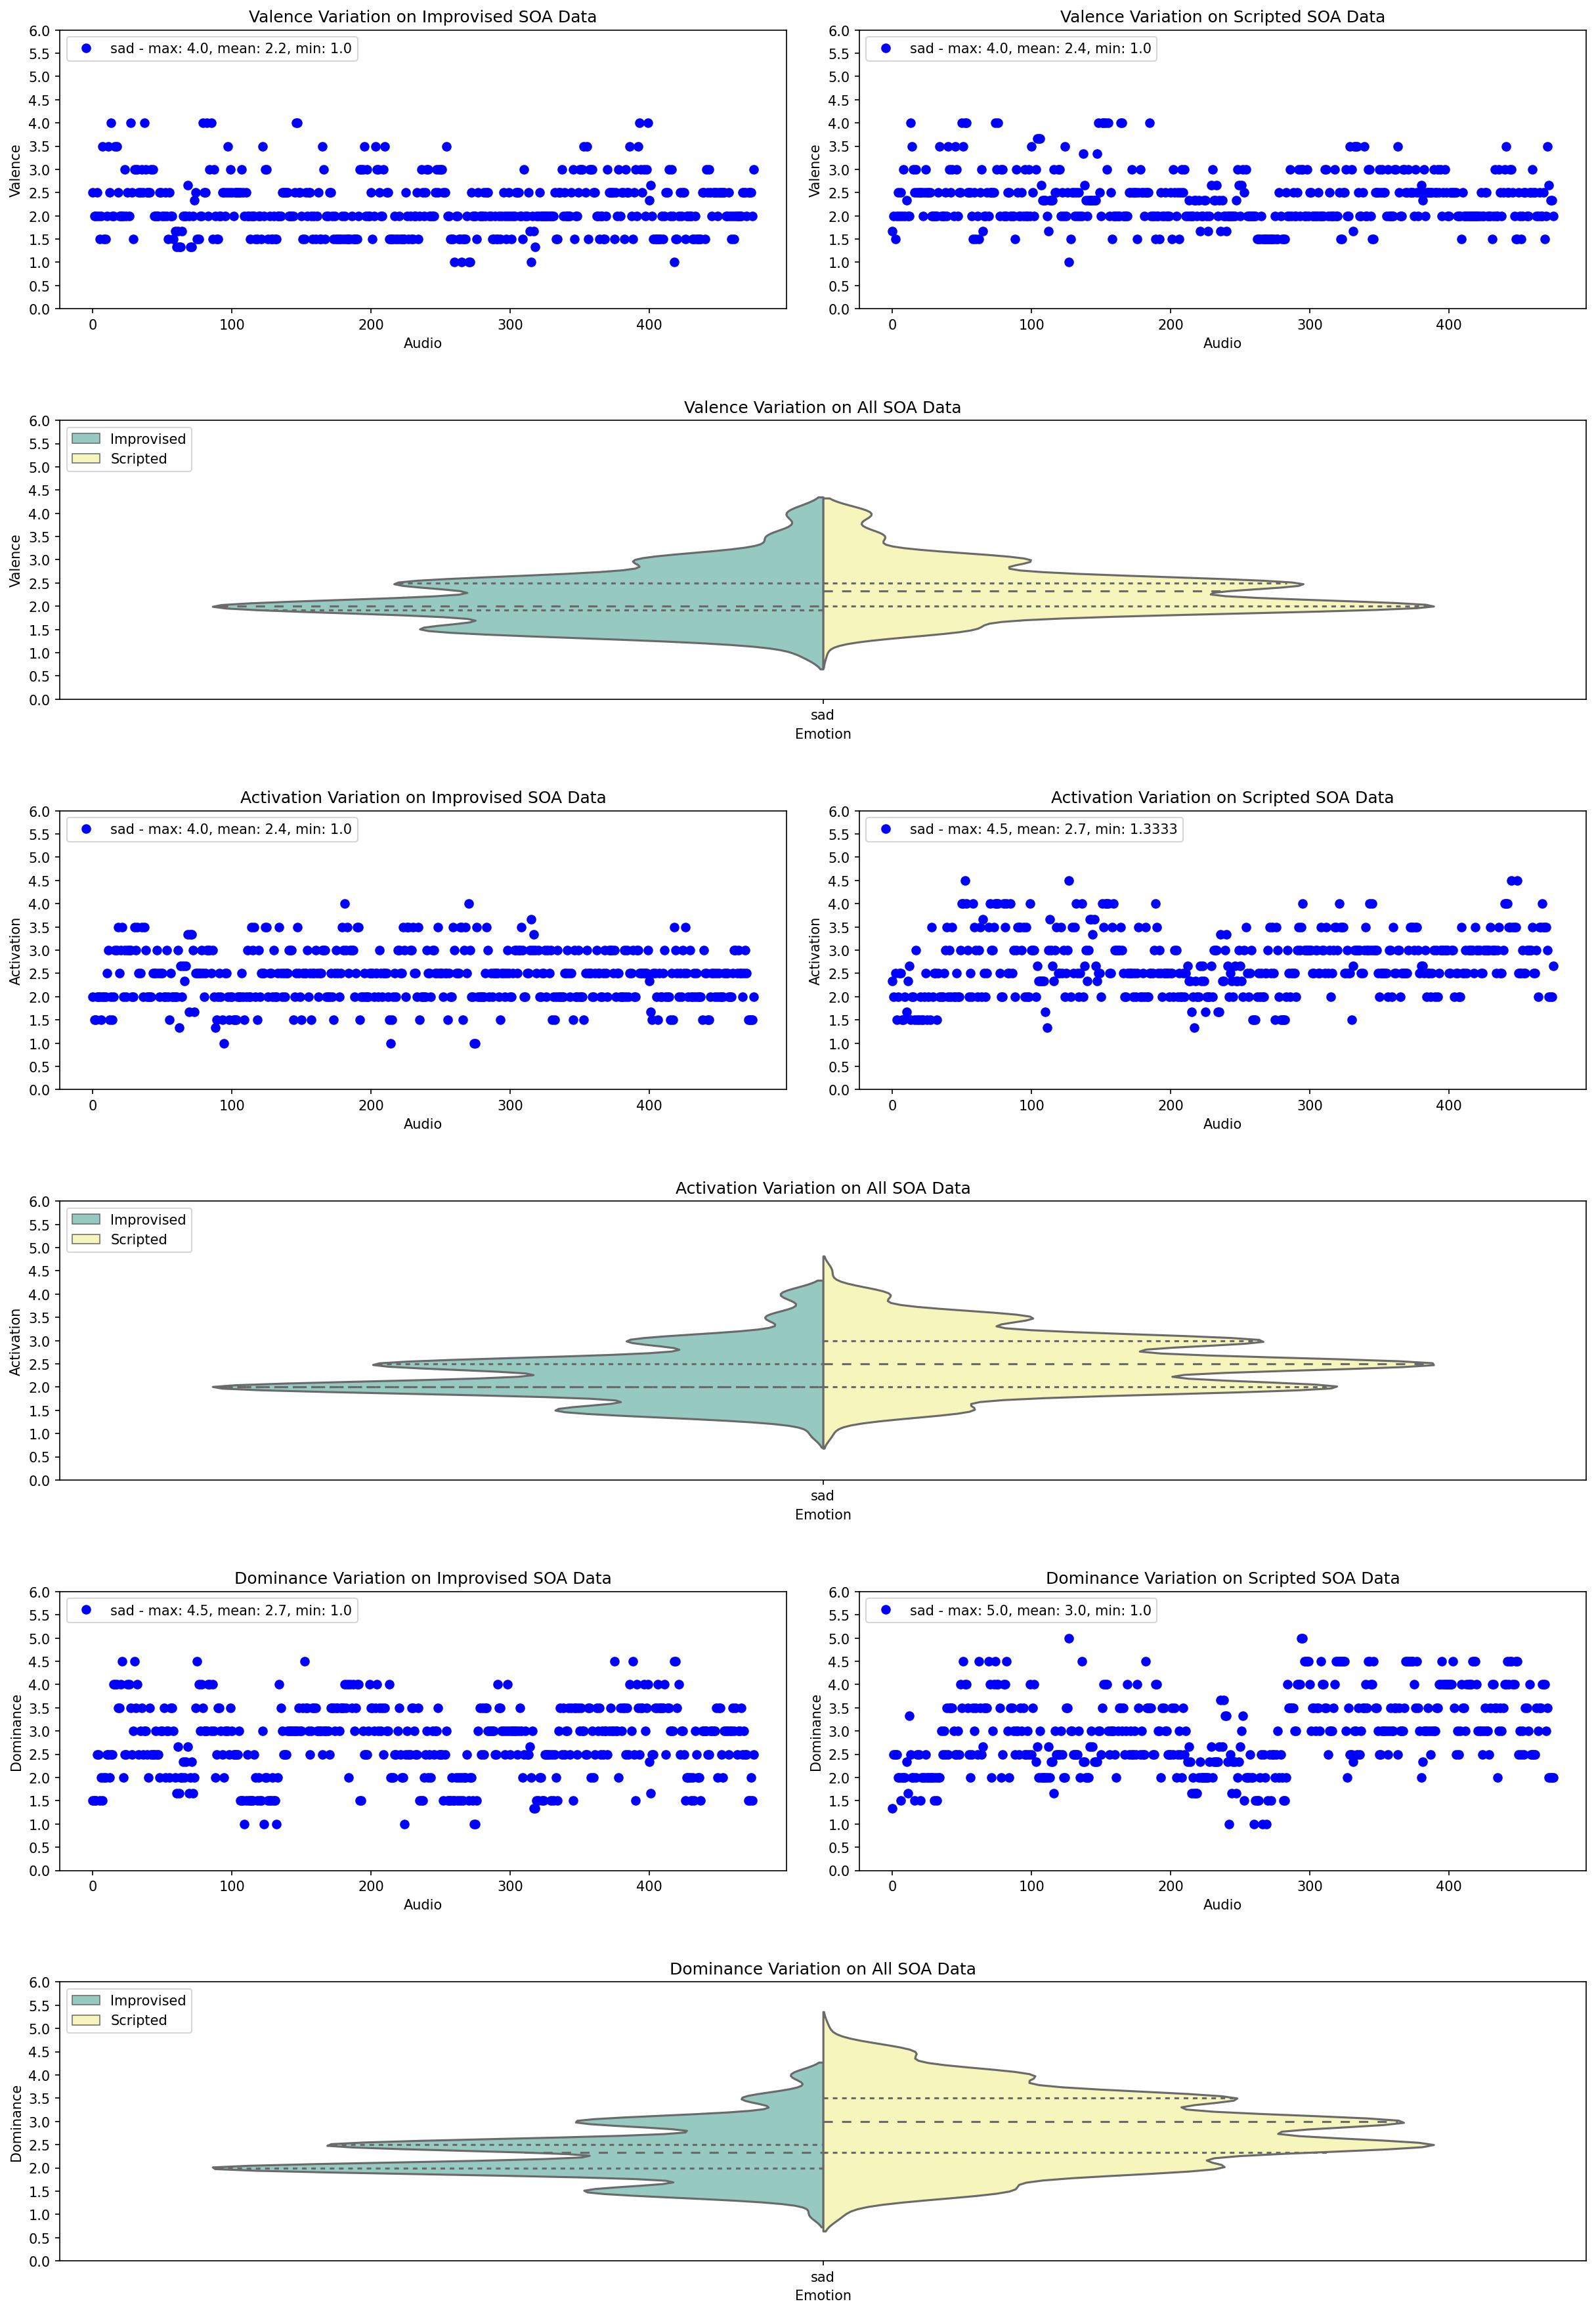

In [17]:
labels_variations(['sad'])

C:\Users\Chico\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


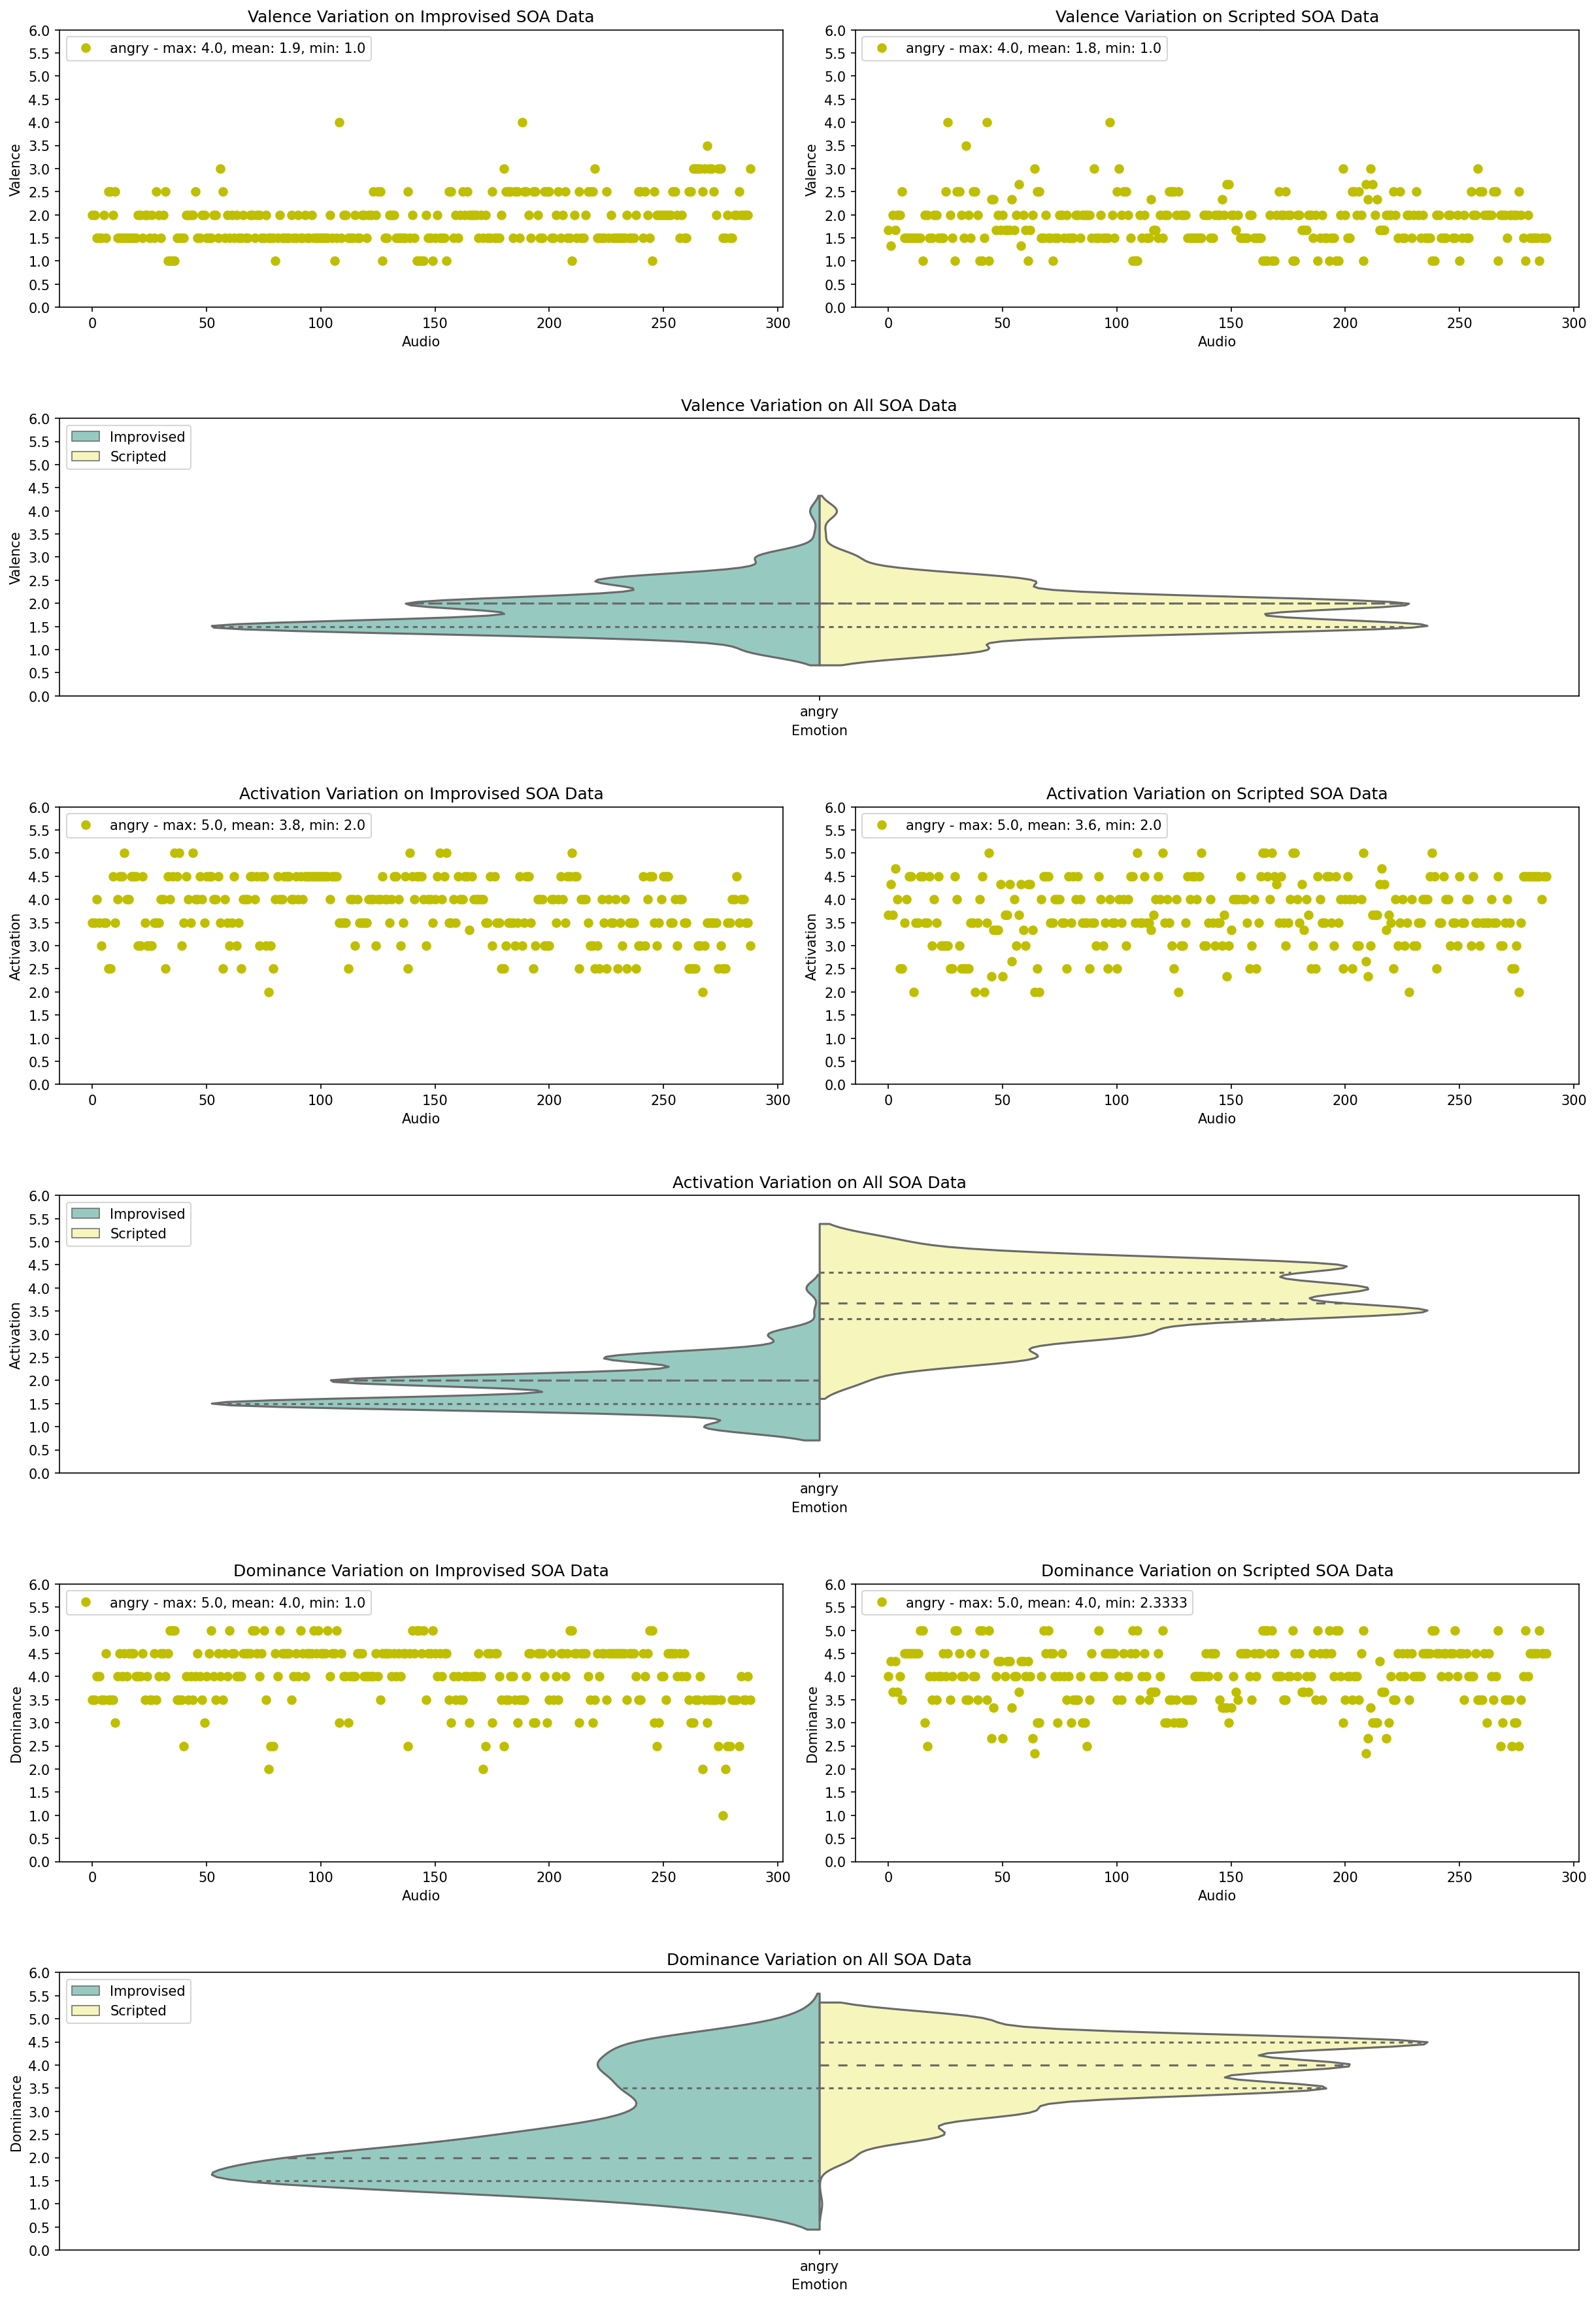

In [18]:
labels_variations(['angry'])

C:\Users\Chico\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


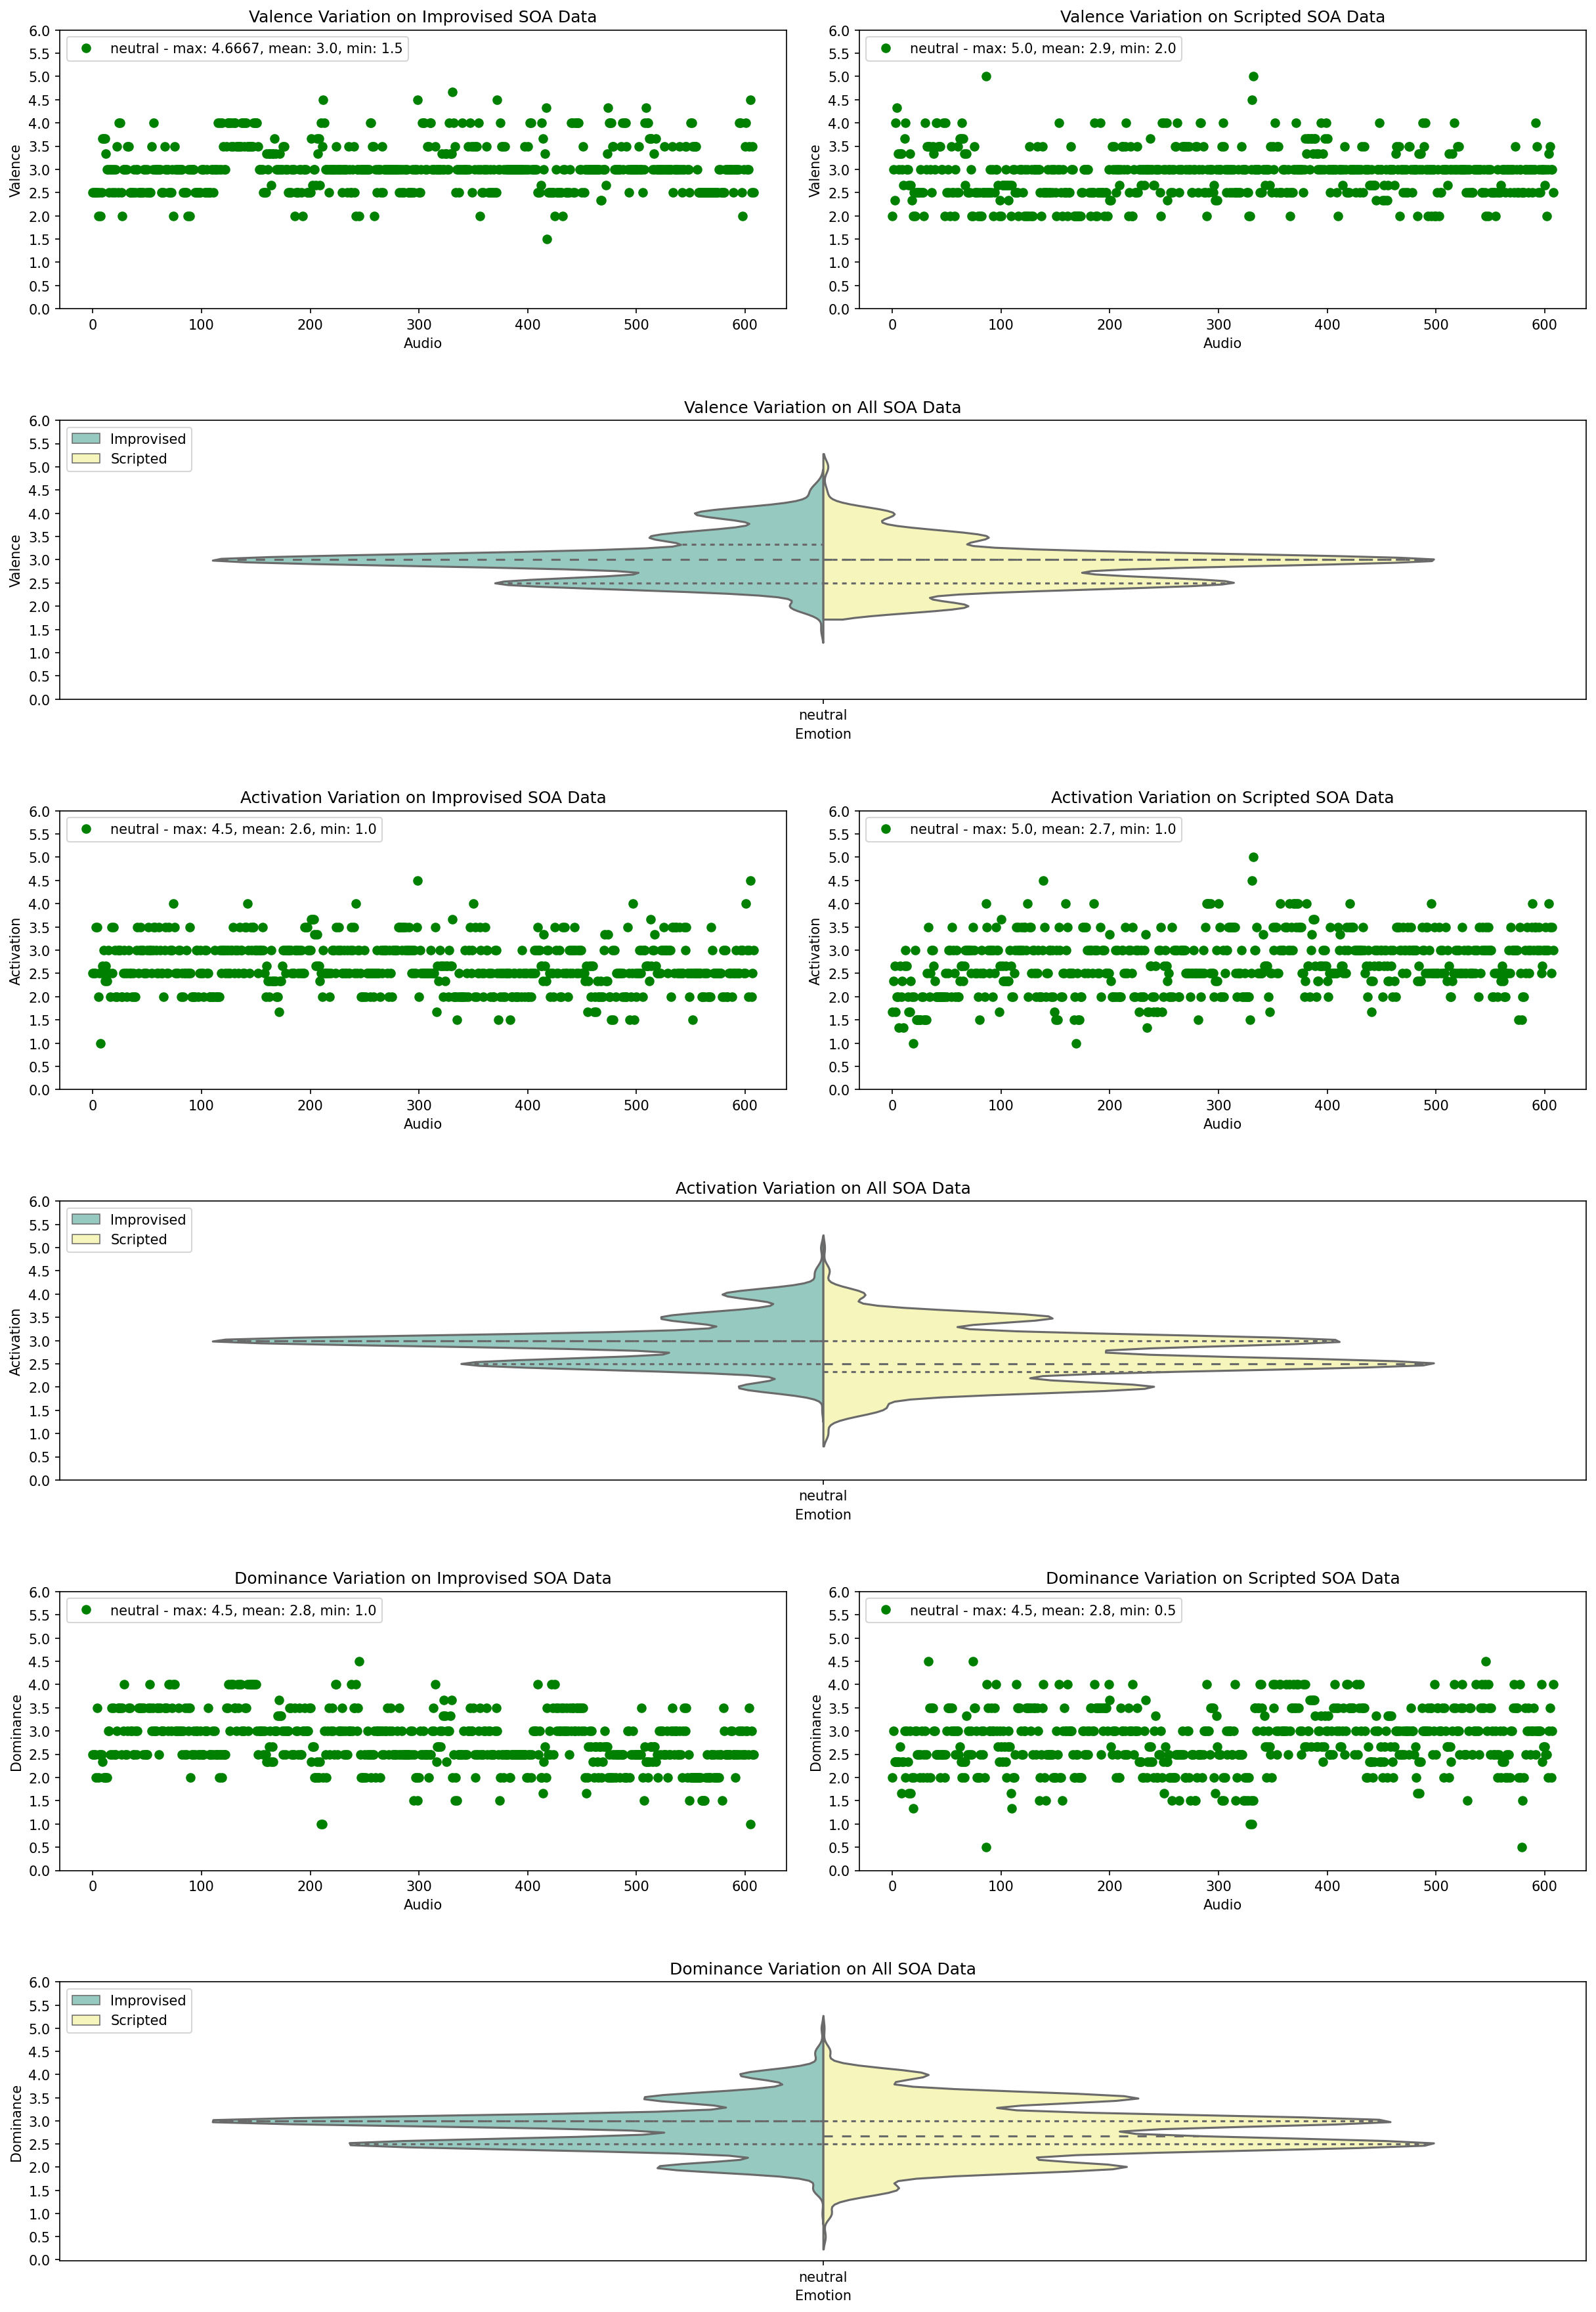

In [19]:
labels_variations(['neutral'])